In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from collections import deque
import random
import matplotlib.pyplot as plt
import logging
import time

Cargar los datos de test

In [2]:
from Double_DQN_hourly import load_and_preprocess_data

# Load test data
data_array, df, scaler = load_and_preprocess_data('C:\\Andrey\\Kakua_Projets\\Trading\\Bot_RL_v1\\Datasets\\historical_01-01-2025_to_04-06-2025_ETHUSDT.csv',load_scaler=True)

# --- Data splitting test data only ---

test_data = data_array

print(f"\nData division:")
print(f"Total: {len(data_array)}")
print(f"Evaluation: {len(test_data)}")

Loaded existing scaler

Data division:
Total: 3647
Evaluation: 3647


Crear agente y cargar modelo entrenado

In [3]:
from Double_DQN_hourly import EnhancedDQNAgent, EnhancedTradingEnvironment

# Initial configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


window_size = 15  
initial_balance = 10000 # USD
test_env = EnhancedTradingEnvironment(test_data, window_size)
state_size = test_env.state_size
action_size = test_env.action_space
save_path = 'best_trading_model.pth'
# Initialize agent  
agent = EnhancedDQNAgent(state_size, action_size, device)

# Load model
agent, best_score, train_rewards = agent.load_model(save_path)

✅ Model loaded successfully to cpu
| ε: 0.0499 | Best Score: 114.73% |


In [ ]:
from Double_DQN_hourly import evaluate

# --- Final Evaluation ---
print("\nEvaluando con datos de test...")
final_return, portfolio_history, price_history, actions_history = evaluate(
    agent, test_env, scaler, initial_balance
)


Evaluando con datos de test...


Metrics

In [5]:
from Double_DQN_hourly import metrics

# Final results and metrics
metrics(portfolio_history, final_return, price_history, actions_history, initial_balance)


--- Final Results ---
Initial Value: $10,000.00
Final Value: $9,391.83
Test Performance (%): -6.08%
Buy & Hold Return: -27.31%
Sharpe Ratio: 0.17
Max Drawdown: $5,829.98 (58.30%)
Actions: Buy=83.6%, Sell=14.7%, Hold=1.7%


Gráficos

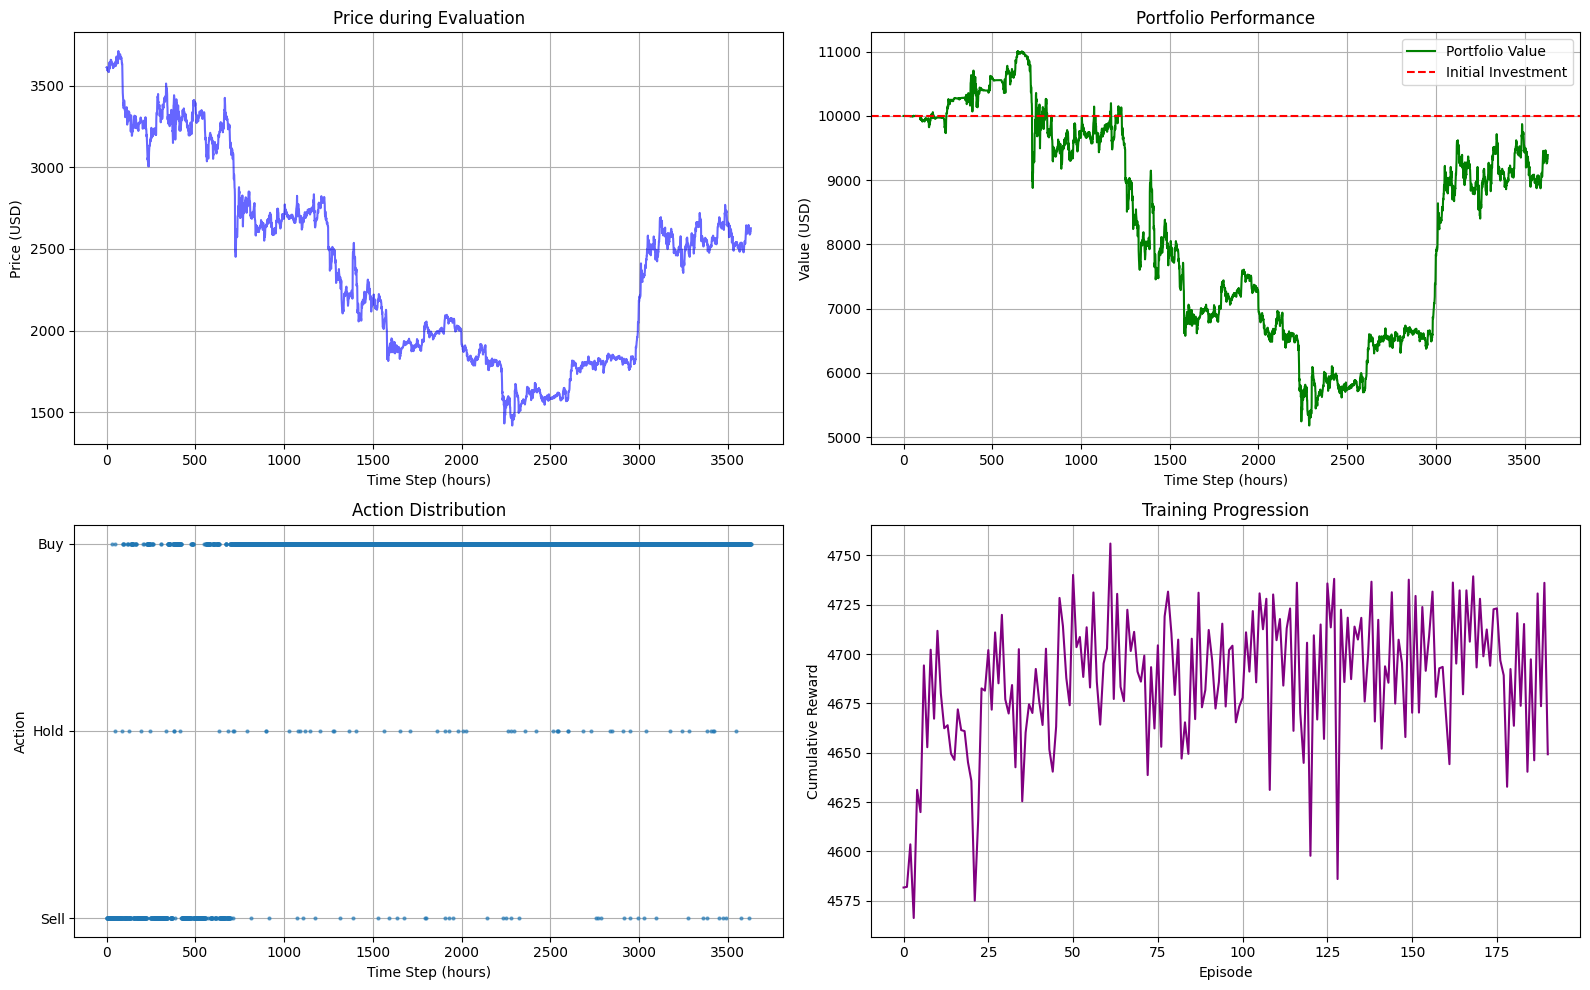

In [6]:
from Double_DQN_hourly import plot_results

plot_results(
        portfolio_history=portfolio_history,
        price_history=price_history,
        actions_history=actions_history,
        train_rewards=train_rewards,
        initial_balance=initial_balance
    )